### Stable Diffusion Project

### By 
### Daniyal Mufti
### Based on Hugging Face library

https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/stable_diffusion.ipynb#scrollTo=zHkHsdtnry57

In [1]:
!nvidia-smi
!pip install diffusers==0.10.0
!pip install transformers scipy ftfy accelerate
!pip install "ipywidgets>=7,<8"


Fri Jan  6 14:06:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.02       Driver Version: 528.02       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:09:00.0  On |                  N/A |
| 53%   24C    P8    44W / 390W |    411MiB / 24576MiB |      7%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from huggingface_hub import notebook_login
notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (manager).
Your token has been saved to C:\Users\Daniy\.huggingface\token
Login successful


In [3]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
from PIL import Image, ImageDraw
import cv2
from IPython.display import display
import torch
torch.cuda.is_available()

C:\Users\Daniy\Anaconda3\envs\tensorflow25\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Daniy\Anaconda3\envs\tensorflow25\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Daniy\Anaconda3\envs\tensorflow25\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


True

In [4]:
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16)   

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

[<PIL.Image.Image image mode=RGB size=512x512 at 0x1DE813ED6A0>]


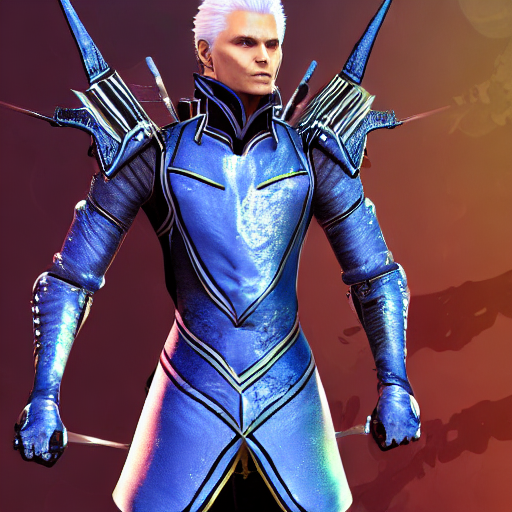

In [16]:
device = 'cuda'
pipe = pipe.to(device)

prompt = 'Vergil in Futuristic armor, photo realistic'
with autocast(device):
  image = pipe(prompt,num_inference_steps=500)[0]
print(image)
display(image[0])
  #print(pipe(prompt))  


 

### Try with higher inference steps

  0%|          | 0/250 [00:00<?, ?it/s]

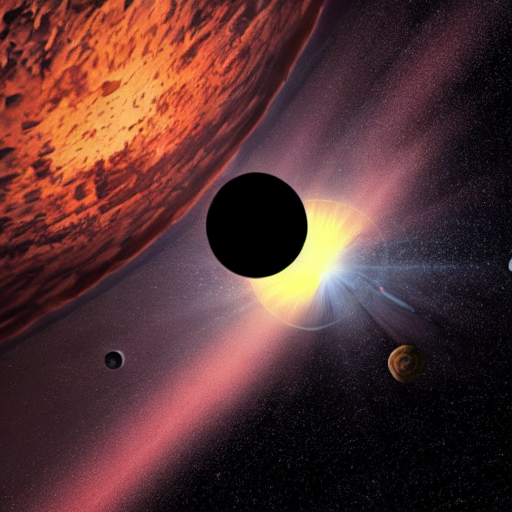

  0%|          | 0/250 [00:00<?, ?it/s]

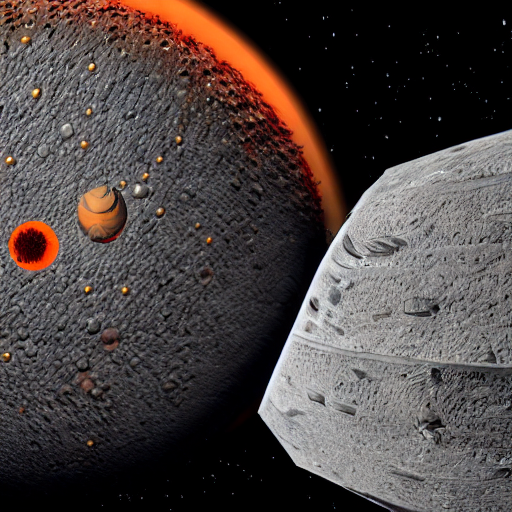

  0%|          | 0/250 [00:00<?, ?it/s]

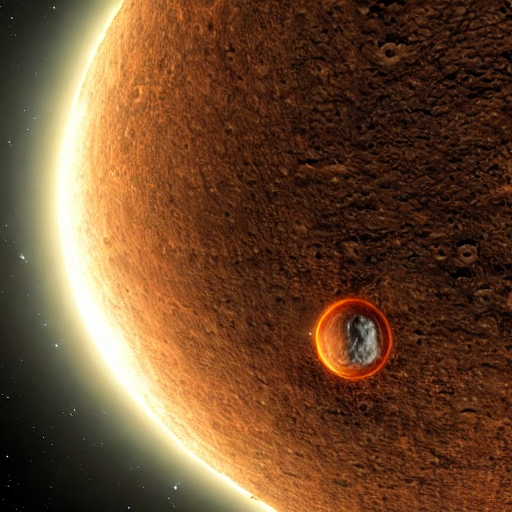

In [6]:
for i in range(3):
    prompt = 'Dyson Sphere around Proxima Centauri'
    with autocast(device):
      image = pipe(prompt, num_inference_steps=250)[0]
      display(image[0])